# Probably approximately correct

what is it missing?

`Probably`: given that you have sampled the data, does it contain enough info about the function you want to learn

`Approximately`: does your learned fuction achieve epsilon-error?


Efficiently, probably, approximately, correct.

In practice, we dont care so much about the `probably` part? We can just restart from another init (although, if we have to do hundreds we probably do care...), and hope we sample the data 'better'. This is a result of many real world applications using offline training?




> _For each $n \ge 1$ let $C_n$ be a set of target concepts over the instance space $\{0,1\}^n$, and let $C = \{C_n\}_{n \ge 1}$. Let $H_n$, for $n \ge 1$, and $H$ be defined similarly. We can define PCA learnability as follows: The concept class $C$ is PCA learnable by the hypothesis space $H$ if there exists a polynomical time learning algorithm $A$ and a polynomial $p(\cdot,\cdot,\cdot)$ such that for all $n \ge 1$, all target concepts $c \in C_n$, all probability distributions $D$ on the instance space $\{0, 1\}^n$, and all $\epsilon$ and $\delta$, where $0 < \epsilon, \delta < 1$, if the algorithm $A$ is given at least $p(n, 1/\epsilon, 1/\delta)$ indepedent random examples of $c$ drawn according to $D$, then with porbabilty at least $1-\delta$, $A$ returns a hypothesis $h \in H_n$ with $error(h) \le \epsilon$. The smallest such polynomial $p$ is called the sampled complexity of the learning algorithm $A$._


* There is no bound on how much memory, compute is used. __Problem is that these depend of the learning algol used...__
* Is it possible to search for A that satisfy this definition? What is the class of all A that can make a problem learnable? What is the size of the class of A that dont learn it (pretty big..)? I guess you could always give A a bunch of prior information...? But what info? How would it actually help? Design a case!! Is PAC PAC learnable?
* It feels weird that there are no assumptions about; smoothness, locality, ... ? What do these buy you? Make a non-PAC learnable now learnable?
* The sample complexity is based on all possible target concepts and distributions. So ... worst case ...
* It is still possible to do an exponential amount of compute with a polynomial number of samples...
* Can we reword this into something more intuitive?

#### Getting closer to practice

* what if you have a noisy/dishonest oracle?
* what about if you hypothesis class doesnt contain the target concept?
* what if the algol doesnt necessarily find the global minima, a 'constitent' algol, but rather some 'good enough' local minima? Aka what about algols with noise!?
* average case?

> Why is $n$ in there?





Questions

* __ How can it be improved to average case?__ Do we even care about average case...? We care about our case, and other similar ones... What occurs in practice...?


In [1]:
import numpy as np
import numpy.random as rnd

import matplotlib.pyplot as plt

In [82]:
# want toy example(s)!? one that is PAC and one that isnt!?
# could use something from cryptography? or just reverse engineering DFAs?
n = 10000  # size of space we are searching
C = np.linspace(0,1,n)
H = set(C)  # hypothesis space is the same as target concept space
# treat it as a set for now. will take advantage of connectedness later

# when you frame this as a search it makes little sense to use real numbers...
# but real numbers have local structure which you can use to help find better
# areas? (but so do discrete variables...)
# but searching over larger spaces can mean there are more 'good' hypotheses to find

def fn(x, f):
    return  (x < f).astype(np.float32)

def loss(x, h, c):
    return np.mean(fn(x, h) == fn(x, c))

class Learning_Algol():
    def __init__(self, hypothesis_class, loss_fn):
        self.h_class = hypothesis_class
        self.loss_fn = loss_fn
        
    def train():
        pass

In [83]:
class Random(Learning_Algol):
    def train(self, x, steps=1000):  
        # the number of steps taken has a big influence...
        # for now, just take enough that 
        h_best = rnd.random()
        l_best = 0.0
        for _ in range(steps):
            h_new = rnd.random()
            l = self.loss_fn(x, h_new)
            if l > l_best:
                h_best = h_new
                l_best = l
        self.h_best = h_best
        return l_best
    
    def test(self, x):
        return self.loss_fn(x, self.h_best)
    
    def train_and_test(self, train_x, test_x):
        _ = self.train(train_x)
        return self.test(test_x)

In [85]:
x = np.random.random((1000,))
c = rnd.choice(C)
loss_fn = lambda x, h: loss(x, h, c=c)
A = Random(H, loss_fn)
A.train(x)

0.999

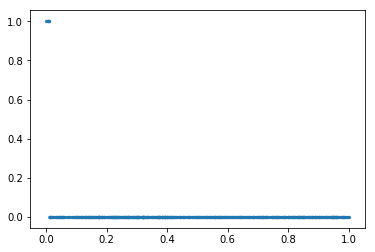

In [86]:
plt.scatter(x, fn(x, c), alpha=0.5, s=5)
# so we are just learning a step fn

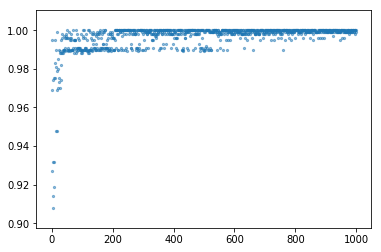

In [87]:
losses = [Random(H, loss_fn).train_and_test(x[:i+1], x)
          for i in range(len(x))]
plt.scatter(range(len(losses)), losses, alpha=0.5, s=5)


Resources

* https://jeremykun.com/2014/01/02/probably-approximately-correct-a-formal-theory-of-learning/
* https://jeremykun.com/2014/04/21/an-un-pac-learnable-problem/

Other questions

* What about `transferable` (aka generalisable?). A concept in X is transferable to Y if ...?
* How can I use an automated proof assistant to help me here?
* Lower bounds?